In [7]:
cd scripts/behavioural_cloning

[Errno 2] No such file or directory: 'scripts/behavioural_cloning'
/home/czyjtu/private/automobile-racing-toolbox/scripts/behavioural_cloning


# REad preprocessed data

In [10]:
import tables 

In [11]:
import torch as th
from torch import nn
import torch.nn.functional as F
device = th.device("cuda" if th.cuda.is_available() else "cpu")

/home/czyjtu/private/automobile-racing-toolbox/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
hdf5_path = "/home/czyjtu/private/automobile-racing-toolbox/data/tmnf_1os.hdf5"
extendable_hdf5_file = tables.open_file(hdf5_path, mode='r')
images_hdf5 = extendable_hdf5_file.root.images[:]
actions_hdf5 = extendable_hdf5_file.root.actions[:]

In [65]:
class MultiLabelnNN(nn.Module):
    def __init__(self, n_channels, n_outputs, w, h):
        super().__init__()
        self.feature_extractor =  nn.Sequential(
            nn.Conv2d(n_channels, 32, kernel_size=8, stride=4, padding=0),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=0),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Flatten()
        )

        def conv2d_size_out(size, kernel_size, stride):
            return (size - (kernel_size - 1) - 1) // stride  + 1

        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w, 8, 4), 4, 2), 3, 1)
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h, 8, 4), 4, 2), 3, 1)
        linear_input_size = convw * convh * 64

        self.classifier = nn.Sequential(
            nn.Linear(linear_input_size, n_outputs),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.to(device)
        x = self.feature_extractor(x)
        return self.classifier(x)


## Forward pass

In [33]:
import matplotlib.pyplot as plt 
import random 

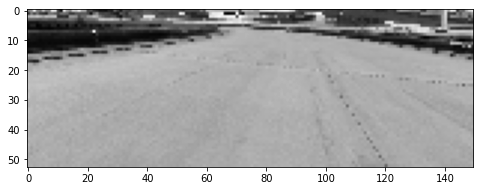

In [39]:
_ = plt.figure(figsize=(8, 8))
smaple_img = random.choice(images_hdf5)
plt.imshow(random.choice(images_hdf5)[:, :, 0], cmap='gray')

In [66]:

model = MultiLabelnNN(4, 4, images_hdf5.shape[1], images_hdf5.shape[2])
sample_image = random.choice(images_hdf5)
x = th.randn()
model.forward(x)

tensor([[0.4950, 0.4961, 0.4884, 0.4970]], grad_fn=<SigmoidBackward0>)